In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results.csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value='-1', inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']
del mental_health_data_df['Permissions']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,Rock,Yes,119,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,N/A
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [5]:
age_bins = [10, 26, 42, 58,  77, 95]
age_labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Post War']
mental_health_data_df['Generation'] = pd.cut(mental_health_data_df['Age'], age_bins, labels=age_labels)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Generation
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,Gen Z
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,Rock,Yes,119,Sometimes,Never,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,N/A,Baby Boomers
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Gen Z
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84,Sometimes,Never,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Baby Boomers
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Gen Z


In [6]:
mental_health_data_df.set_index('Generation', inplace=True)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Generation,,,,,,,,,,,,,,,,,,,,,
Gen Z,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A
Baby Boomers,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,Rock,Yes,119,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,N/A
Gen Z,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
Baby Boomers,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
Gen Z,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [7]:
generation_groups = mental_health_data_df.groupby('Generation')
mean_by_generation = generation_groups.mean()
del mean_by_generation['Age']
del mean_by_generation['Hours per day']
mean_by_generation

,Anxiety,Depression,Insomnia,OCD
Generation,,,,
Gen Z,6.006604,4.918868,3.610377,2.760377
Millennials,6.078014,5.184397,4.404255,2.751773
Gen X,3.411765,3.000000,3.676471,1.529412
Baby Boomers,4.296296,3.037037,2.962963,1.037037
Post War,3.500000,1.500000,4.500000,1.000000


In [8]:
median_by_generation = generation_groups.median()
del median_by_generation['Age']
del median_by_generation['Hours per day']
median_by_generation

,Anxiety,Depression,Insomnia,OCD
Generation,,,,
Gen Z,7.0,5.0,3.0,2.0
Millennials,7.0,6.0,4.0,2.0
Gen X,3.0,2.0,2.0,1.0
Baby Boomers,4.0,2.0,2.0,1.0
Post War,3.5,1.5,4.5,1.0


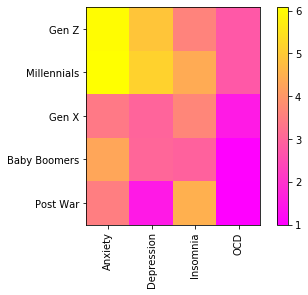

In [14]:
mental_illness_labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, ax = plt.subplots()
#create heat map
mean_im = ax.imshow(mean_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(mean_im, ax=ax)

# add labels
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)

# display plot
plt.show()

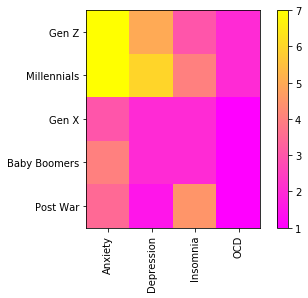

In [19]:
fig, ax = plt.subplots()
#create heat map
median_im = ax.imshow(median_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(median_im, ax=ax)

# add labels
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)

# display plot
plt.show()